In [1]:
#importamos librerias y archivo
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
data=pd.read_csv ('properati.csv')
#data.loc[:,["price","currency"]].head(20)

#veamos vacios de place_name
mask_place_name_null = data.place_name.isnull()
data.place_with_parent_names[mask_place_name_null].value_counts()
#al ser todos los faltantes de tigre se los asigno a place_name
data["place_name"]=data.apply(lambda x : 'Tigre' if x['place_name'] is np.NaN else x['place_name'], axis=1)

#extraemos la cantidad de cuartos del campo title
pattern_room =("(?P<trae>\d*\s(?=dorm)|\d\s(?=Dorm)|\d\s(?=DORM)|\d*\s(?=AMB)|[a-zA-Z](?=ONOAMB)|\d*\s(?=amb)|[a-zA-Z](?=onoamb))*")
objeto_room= re.compile(pattern_room)
mask_pattern_room=data.title.apply (lambda x: x if x is np.NaN else objeto_room.match(x.lower()))
new_room = mask_pattern_room.apply(lambda x: x if x is np.NaN else x.group("trae"))
data["new_room"]=new_room.str.strip()
data["new_room"]=data["new_room"].replace ("m",1)
data["new_room"]=data["new_room"].replace ("M",1)
new_room.notnull().sum()

#extraemos la cantidad de cuartos del campo description
pattern_room_desc =("(?P<ambs>\d*\s(?=dorm)|\d*\s(?=amb)|[a-zA-Z](?=onoamb))*")
objeto_room_desc= re.compile(pattern_room_desc)
mask_pattern_room_desc=data.description.apply (lambda x: x if x is np.NaN else objeto_room_desc.match(x.lower()))
new_room_desc = mask_pattern_room_desc.apply(lambda x: x if x is np.NaN else x.group("ambs"))
data["new_room_desc"]=new_room.str.strip()
data["new_room_desc"]=data["new_room_desc"].replace ("m",1)
data["new_room_desc"]=data["new_room_desc"].replace ("M",1)
new_room_desc.notnull().sum()

#nos quedamos con el valor final de rooms
data["new_room_coalesce"]=data.apply(lambda x : x['rooms'] if x['rooms']>0 else x['new_room'], axis=1)
data["new_room_coalesce"]=pd.to_numeric(data["new_room_coalesce"])
data["new_room_final"]=data.apply(lambda x : x['new_room_coalesce'] if x['new_room_coalesce']>0 else x['new_room_desc'], axis=1)
data["new_room_final"]=pd.to_numeric(data["new_room_final"])
data["title"]=data["title"].str.lower()
data["description"]=data["description"].str.lower()
data["title"]=data["title"].replace (" uno ",1)
data["description"]=data["description"].replace (" uno ",1)
data["title"]=data["title"].replace (" una ",1)
data["description"]=data["description"].replace (" una ",1)
data["title"]=data["title"].replace (" un ",1)
data["description"]=data["description"].replace (" un ",1)
data["title"]=data["title"].replace (" dos ",2)
data["description"]=data["description"].replace (" dos ",2)
data["title"]=data["title"].replace (" tres ",3)
data["description"]=data["description"].replace (" tres ",3)
data["title"]=data["title"].replace (" cuatro ",4)
data["description"]=data["description"].replace (" cuatro ",4)
data["title"]=data["title"].replace (" cinco ",5)
data["description"]=data["description"].replace (" cinco ",5)
data["title"]=data["title"].replace (" seis ",6)
data["description"]=data["description"].replace (" seis ",6)
data["title"]=data["title"].replace (" siete ",7)
data["description"]=data["description"].replace (" siete ",7)
data["title"]=data["title"].replace (" ocho ",8)
data["description"]=data["description"].replace (" ocho ",8)
data["title"]=data["title"].replace (" nueve ",9)
data["description"]=data["description"].replace (" nueve ",9)


#extraemos la cantidad de cuartos del campo title
#pattern_room =("(\d+(?=\s?dorm.?)|\d+(?=\s?amb.?)|[a-zA-Z](?=onoamb.?)|[a-zA-Z](?=ono amb.?))*")
pattern_room =("\d+(?=\s?dorm.?)|\d+(?=\s?amb.?)|[a-zA-Z](?=onoamb.?)|[a-zA-Z](?=ono amb.?)")
objeto_room= re.compile(pattern_room)
mask_pattern_room=data.title.apply (lambda x: None if x is np.NaN else objeto_room.search(x))
new_room = mask_pattern_room.apply(lambda x: x if x is None else x.group())
data["new_room"]=new_room.str.strip()
#data["new_room"]=mask_pattern_room.str.strip()
data["new_room"]=data["new_room"].replace ("m",1)
data["new_room"]=data["new_room"].replace ("M",1)
data["new_room"]=pd.to_numeric(data["new_room"])
#data["new_room"]=new_room
new_room.notnull().sum()

#extraemos la cantidad de cuartos del campo description
#pattern_room =("(\d+(?=\s?dorm.?)|\d+(?=\s?amb.?)|[a-zA-Z](?=onoamb.?)|[a-zA-Z](?=ono amb.?))*")
pattern_room_desc =("\d+(?=\s?dorm.?)|\d+(?=\s?amb.?)|[a-zA-Z](?=onoamb.?)|[a-zA-Z](?=ono amb.?)")
objeto_room_desc= re.compile(pattern_room_desc)
mask_pattern_room_desc=data.description.apply (lambda x: None if x is np.NaN else objeto_room_desc.search(x))
new_room_desc = mask_pattern_room_desc.apply(lambda x: x if x is None else x.group())
data["new_room_desc"]=new_room_desc.str.strip()
data["new_room_desc"]=data["new_room_desc"].replace ("m",1)
data["new_room_desc"]=data["new_room_desc"].replace ("n",1)
data["new_room_desc"]=pd.to_numeric(data["new_room_desc"])
#data["new_room_desc"]=new_room_desc
new_room_desc.notnull().sum()


#nos quedamos con el valor final de rooms
data["new_room_coalesce"]=data.apply(lambda x : x['rooms'] if x['rooms']>0 else x['new_room'], axis=1)
data["new_room_coalesce"]=pd.to_numeric(data["new_room_coalesce"])
data["new_room_final"]=data.apply(lambda x : x['new_room_coalesce'] if x['new_room_coalesce']>0 else x['new_room_desc'], axis=1)
data["new_room_final"]=pd.to_numeric(data["new_room_final"])

#extraemos los metros cuadrados del campo title
pattern_m2="\d+(?=\.?\,?\d+\s?metro.?)|\d+(?=\.?\,?\d+\s?m2.?)|\\d+(?=\.?\,?\d+\s?mts.?)|\d+(?=\.?\,?\d+\s?m(\.|\,|\s))"
objeto_m2=re.compile(pattern_m2)
mask_pattern_m2=data.title.apply (lambda x: None if x is np.NaN else objeto_m2.search(x))
new_m2 = mask_pattern_m2.apply(lambda x: x if x is None else x.group())
data["new_m2"]=new_m2.str.strip()
data["new_m2"]=pd.to_numeric(data["new_m2"])
new_m2.notnull().sum()
#data[["new_m2","surface_covered_in_m2"]].to_csv("salida2.csv")
#data["new_m2"].value_counts()
#extraemos los metros cuadrados del campo description
pattern_m2_desc="\d+(?=\.?\,?\d+\s?metro)|\d+(?=\.?\,?\d+\s?m2)|\\d+(?=\.?\,?\d+\s?mts)|\d+(?=\.?\,?\d+\s?m(\.|\,|\s))"
objeto_m2_desc=re.compile(pattern_m2_desc)
mask_pattern_m2_desc=data.description.apply (lambda x: None if x is np.NaN else objeto_m2_desc.search(x))
new_m2_desc = mask_pattern_m2_desc.apply(lambda x: x if x is None else x.group())
data["new_m2_desc"]=new_m2_desc.str.strip()
#data["new_m2_desc"]=pd.to_numeric(data["new_m2_desc"])
new_m2_desc.notnull().sum()

#nos quedamos con el valor final de m2
data["new_m2_covered_coalesce"]=data.apply(lambda x : x['surface_covered_in_m2'] if x['surface_covered_in_m2']>0 else x['new_m2'], axis=1)
data["new_m2_covered_coalesce"]=pd.to_numeric(data["new_m2_covered_coalesce"])
data["new_m2_covered_final"]=data.apply(lambda x : x['new_m2_covered_coalesce'] if x['new_m2_covered_coalesce']>0 else x['new_m2_desc'], axis=1)
data["new_m2_covered_final"]=pd.to_numeric(data["new_m2_covered_final"])
#extraemos los metros cuadrados del campo title
pattern_m2="(?P<metros>\d*\.?\,?\d+\s?(?=m2)|\d*\.?\,?\d*\s?(?=MTS)|\d*\.?\,?\d*\s?(?=m)|\d*\.?\,?\d*\s?(?=M2))*"
objeto_m2=re.compile(pattern_m2)
mask_pattern_m2=data.title.apply (lambda x: x if x is np.NaN else objeto_m2.match(x.lower()))
new_m2 = mask_pattern_m2.apply(lambda x: x if x is np.NaN else x.group("metros"))
data["new_m2"]=new_m2.str.strip()
new_m2.notnull().sum()
#data[["new_m2","surface_covered_in_m2"]].to_csv("salida2.csv")
#data["new_m2"].value_counts()
#extraemos los metros cuadrados del campo description
pattern_m2_desc="(?P<metros>\d*\.?\,?\d+\s?(?=metro)|\d*\.?\,?\d+\s?(?=m2)|\d*\.?\,?\d*\s?(?=mts)|\d*\.?\,?\d*\s?(?=m(\.|\,|\s)))*"
objeto_m2_desc=re.compile(pattern_m2_desc)
mask_pattern_m2_desc=data.description.apply (lambda x: x if x is np.NaN else objeto_m2_desc.match(x.lower()))
new_m2_desc = mask_pattern_m2_desc.apply(lambda x: x if x is np.NaN else x.group("metros"))
data["new_m2_desc"]=new_m2.str.strip()
new_m2_desc.notnull().sum()
#nos quedamos con el valor final de m2
data["new_m2_covered_final"]=data.apply(lambda x : x['surface_covered_in_m2'] if x['surface_covered_in_m2']>0 else x['new_m2_desc'], axis=1)
data["new_m2_covered_final"]=pd.to_numeric(data["new_m2_covered_final"])
#extraemos el valor de dolares del campo description
pattern_usd="((?P<usd>(?<=USD)\s?\d*\.?\,?\d*?)\s)"
objeto_usd=re.compile(pattern_usd)
mask_pattern_usd=data.title.apply (lambda x: x if x is np.NaN else objeto_usd.match(x))
#new_usd = mask_pattern_usd.apply(lambda x: x if x is np.NaN else x.group("usd"))
#data["new_usd"]=new_usd
#data.to_csv("salida.csv")
#new_usd.notnull().sum()
#tomamos la operacion y el tipo de propiedad de la url
data["new_operacion"]=data.properati_url.str.split('_').str[1]
#data["new_operacion"].value_counts()
data["new_tipo_prop"]=data.properati_url.str.split('_').str[2]
data["new_tipo_prop"].value_counts()
#dummies para los ammenities
data.loc[data.description.str.contains(pat="((\.|\,|\s)(gym)|(\.|\,|\s)(gimnasio))", case=False, na=False, regex=True),'gym'] = 1
data.loc[~(data.description.str.contains(pat="((\.|\,|\s)(gym)|(\.|\,|\s)(gimnasio))", case=False, na=False, regex=True)),'gym'] = 0
data.loc[data.description.str.contains(pat="((\.|\,|\s)(sum)|(\.|\,|\s)(usos multiples)|(\.|\,|\s)(multiproposito))", case=False, na=False, regex=True),'sum'] = 1
data.loc[~(data.description.str.contains(pat="((\.|\,|\s)(sum)|(\.|\,|\s)(usos multiples)|(\.|\,|\s)(multiproposito))", case=False, na=False, regex=True)),'sum'] = 0
data.loc[data.description.str.contains(pat="((\.|\,|\s)(pileta)|(\.|\,|\s)(piscina))", case=False, na=False, regex=True),'pileta'] = 1
data.loc[~(data.description.str.contains(pat="((\.|\,|\s)(pileta)|(\.|\,|\s)(piscina))", case=False, na=False, regex=True)),'pileta'] = 0
data.loc[data.description.str.contains(pat="((\.|\,|\s)(spa))", case=False, na=False, regex=True),'spa'] = 1
data.loc[~(data.description.str.contains(pat="((\.|\,|\s)(spa))", case=False, na=False, regex=True)),'spa'] = 0
data.loc[data.description.str.contains(pat="((\.|\,|\s)(lavadero)|(\.|\,|\s)(loundry)|(\.|\,|\s)(laundry)|(\.|\,|\s)(lavado))", case=False, na=False, regex=True),'laundry'] = 1
data.loc[~(data.description.str.contains(pat="((\.|\,|\s)(lavadero)|(\.|\,|\s)(loundry)|(\.|\,|\s)(laundry)|(\.|\,|\s)(lavado))", case=False, na=False, regex=True)),'laundry'] = 0
data.loc[data.description.str.contains(pat="((\.|\,|\s)(balcon))", case=False, na=False, regex=True),'balcon'] = 1
data.loc[~(data.description.str.contains(pat="((\.|\,|\s)(balcon))", case=False, na=False, regex=True)),'balcon'] = 0
data.loc[data.description.str.contains(pat="((\.|\,|\s)(jardin)|(\.|\,|\s)(patio)|(\.|\,|\s)(parque))", case=False, na=False, regex=True),'patio'] = 1
data.loc[~(data.description.str.contains(pat="((\.|\,|\s)(jardin)|(\.|\,|\s)(patio)|(\.|\,|\s)(parque))", case=False, na=False, regex=True)),'patio'] = 0
data.loc[data.description.str.contains(pat="((\.|\,|\s)(terraza))", case=False, na=False, regex=True),'terraza'] = 1
data.loc[~(data.description.str.contains(pat="((\.|\,|\s)(terraza))", case=False, na=False, regex=True)),'terraza'] = 0
data.loc[data.description.str.contains(pat="((\.|\,|\s)(hidromasaje)|(\.|\,|\s)(hidro masaje))", case=False, na=False, regex=True),'hidromasaje'] = 1
data.loc[~(data.description.str.contains(pat="((\.|\,|\s)(hidromasaje)|(\.|\,|\s)(hidro masaje))", case=False, na=False, regex=True)),'hidromasaje'] = 0
percent_missing = data.isnull().sum() * 100 / len(data)
missing_value_df = pd.DataFrame({'column_name': data.columns,
                            'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True, ascending=False)
missing_value_df
#data.to_csv("salida.csv")

C:\Users\carrasco.angel\Anaconda3\envs\dhdsblend\lib\site-packages\pandas\core\strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,column_name,percent_missing
new_m2_desc,new_m2_desc,97.354397
new_m2,new_m2,97.354397
floor,floor,93.483749
expenses,expenses,88.234615
new_room,new_room,73.144696
rooms,rooms,60.905791
new_room_coalesce,new_room_coalesce,49.442336
price_usd_per_m2,price_usd_per_m2,43.394654
lat-lon,lat-lon,42.525986
lon,lon,42.525986


In [2]:
placename_Counts  = data[data.price_usd_per_m2.notnull()].place_name.value_counts()
placename_Counts = pd.DataFrame({'place_name':placename_Counts.index, 'conteo':placename_Counts.values})
placename_Counts
data=pd.merge(data, placename_Counts, how='inner', on=['place_name'])
data["conteo"]=data.conteo
data=data[data.conteo>200]
data.place_name.value_counts()

Córdoba              9254
Rosario              8504
Mar del Plata        6534
Tigre                3347
Nordelta             3315
                     ... 
Colegiales            352
Parque Patricios      322
Congreso              304
Constitución          286
Barrio Los Alisos     278
Name: place_name, Length: 72, dtype: int64

In [3]:
unique_state_name=data.place_name.unique()

place_name_loop=[]
lim_inf=[]
lim_sup=[]

for i in unique_state_name:
    inf=data[data.place_name=="{}".format(i)].price_usd_per_m2.quantile(q=0.75)-1.5*(data[data.place_name=="{}".format(i)].price_usd_per_m2.quantile(q=0.75)-data[data.place_name=="{}".format(i)].price_usd_per_m2.quantile(q=0.25))
    sup=data[data.place_name=="{}".format(i)].price_usd_per_m2.quantile(q=0.75)+1.5*(data[data.place_name=="{}".format(i)].price_usd_per_m2.quantile(q=0.75)-data[data.place_name=="{}".format(i)].price_usd_per_m2.quantile(q=0.25))
    lim_inf.append(inf)
    lim_sup.append(sup)
    place_name_loop.append(i)

outlier_management=pd.DataFrame({'place_name' : place_name_loop,'lim_inf' : lim_inf,'lim_sup' : lim_sup })

data=data=pd.merge(data, outlier_management, how='inner', on=['place_name'])

data_outlier_mask=(data['price_usd_per_m2']>=data['lim_inf']) & (data['price_usd_per_m2']< data['lim_sup'])
data=data[data_outlier_mask]


In [4]:
outlier_management.sort_values("lim_sup",ascending=False)

,place_name,lim_inf,lim_sup
60,San Cristobal,-8052.504131,51157.343417
14,Boedo,-6648.315965,43294.014890
16,Puerto Madero,4329.933704,9015.291522
59,La Lucila,1312.672755,5777.061759
43,Recoleta,2029.228968,5678.030985
...,...,...,...
34,Punilla,-188.271401,2525.091234
5,Córdoba,703.615574,2504.850897
69,Avellaneda,989.255607,2438.337348
18,Escobar,600.775508,2310.080626


In [5]:
data=data[data.place_name!="San Cristobal"]
data=data[data.place_name!="Boedo"]
data.place_name.value_counts()

Mar del Plata       3456
Rosario             2894
Córdoba             2433
Tigre               1967
Nordelta            1964
                    ... 
Parque Patricios     194
Congreso             193
Canning              188
Constitución         178
Luján                175
Name: place_name, Length: 70, dtype: int64

<Figure size 2160x1440 with 0 Axes>

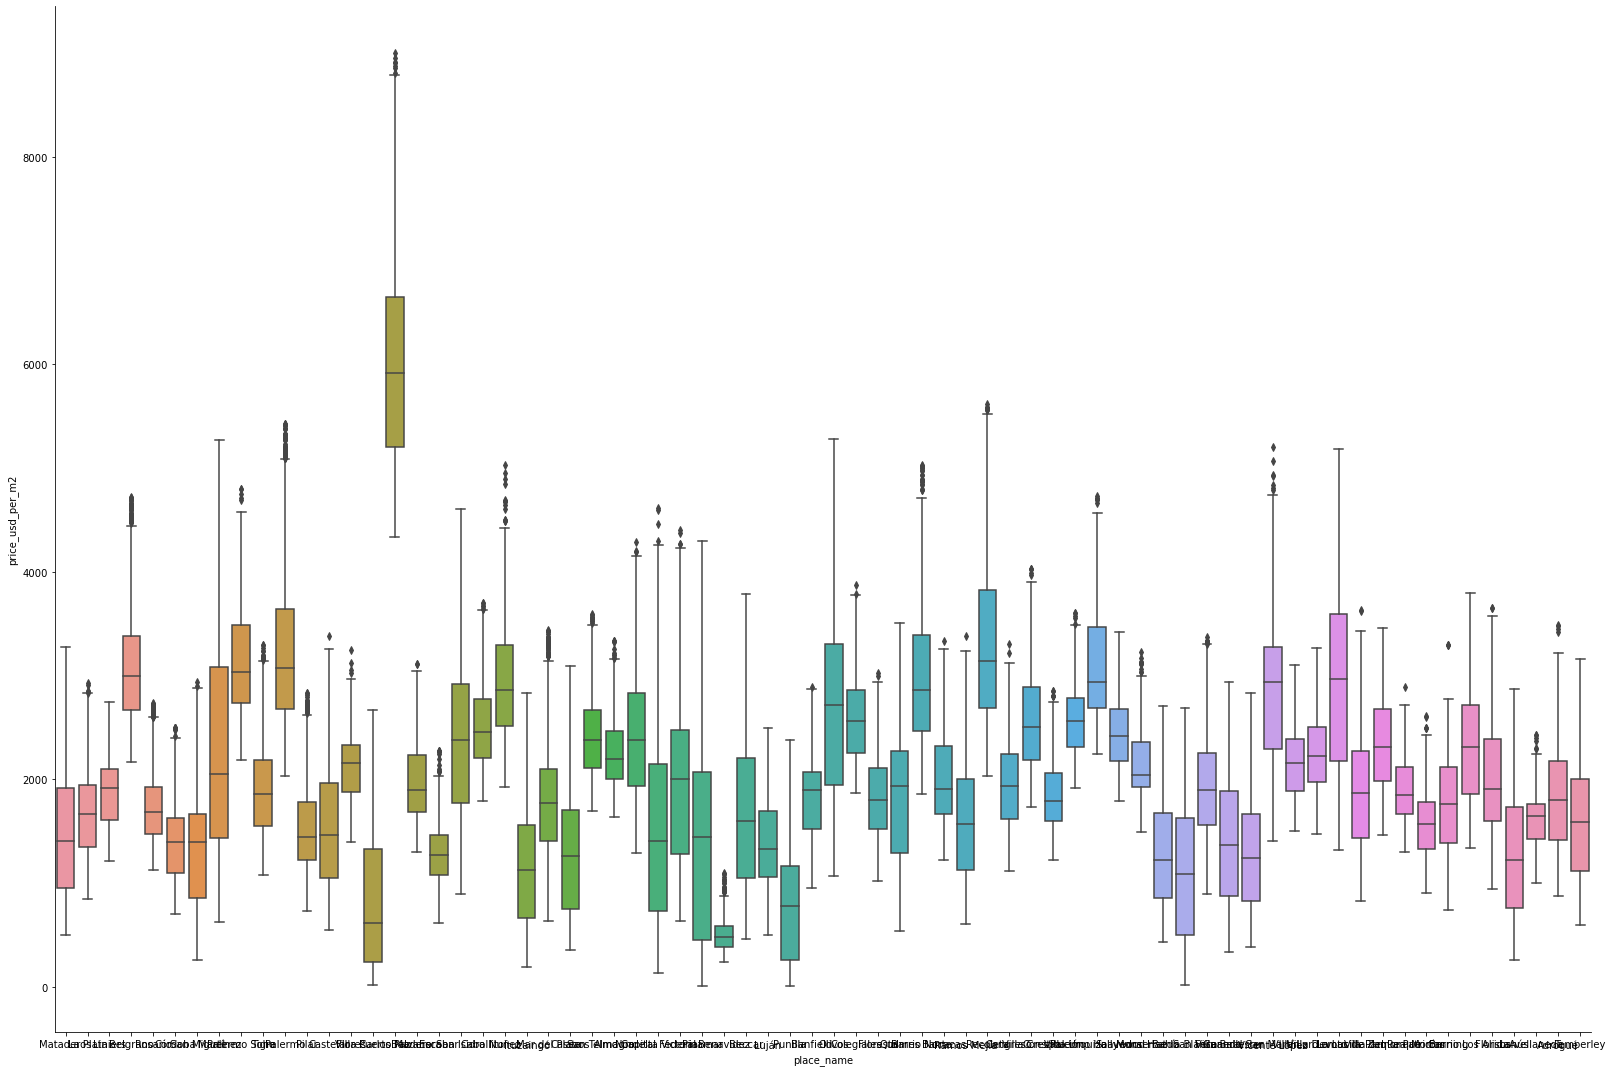

In [6]:
import seaborn as sns
plt.figure(figsize=(30,20))
ax = sns.catplot(x="place_name", y="price_usd_per_m2", data=data, kind='box',
            height=15, aspect=1.5)

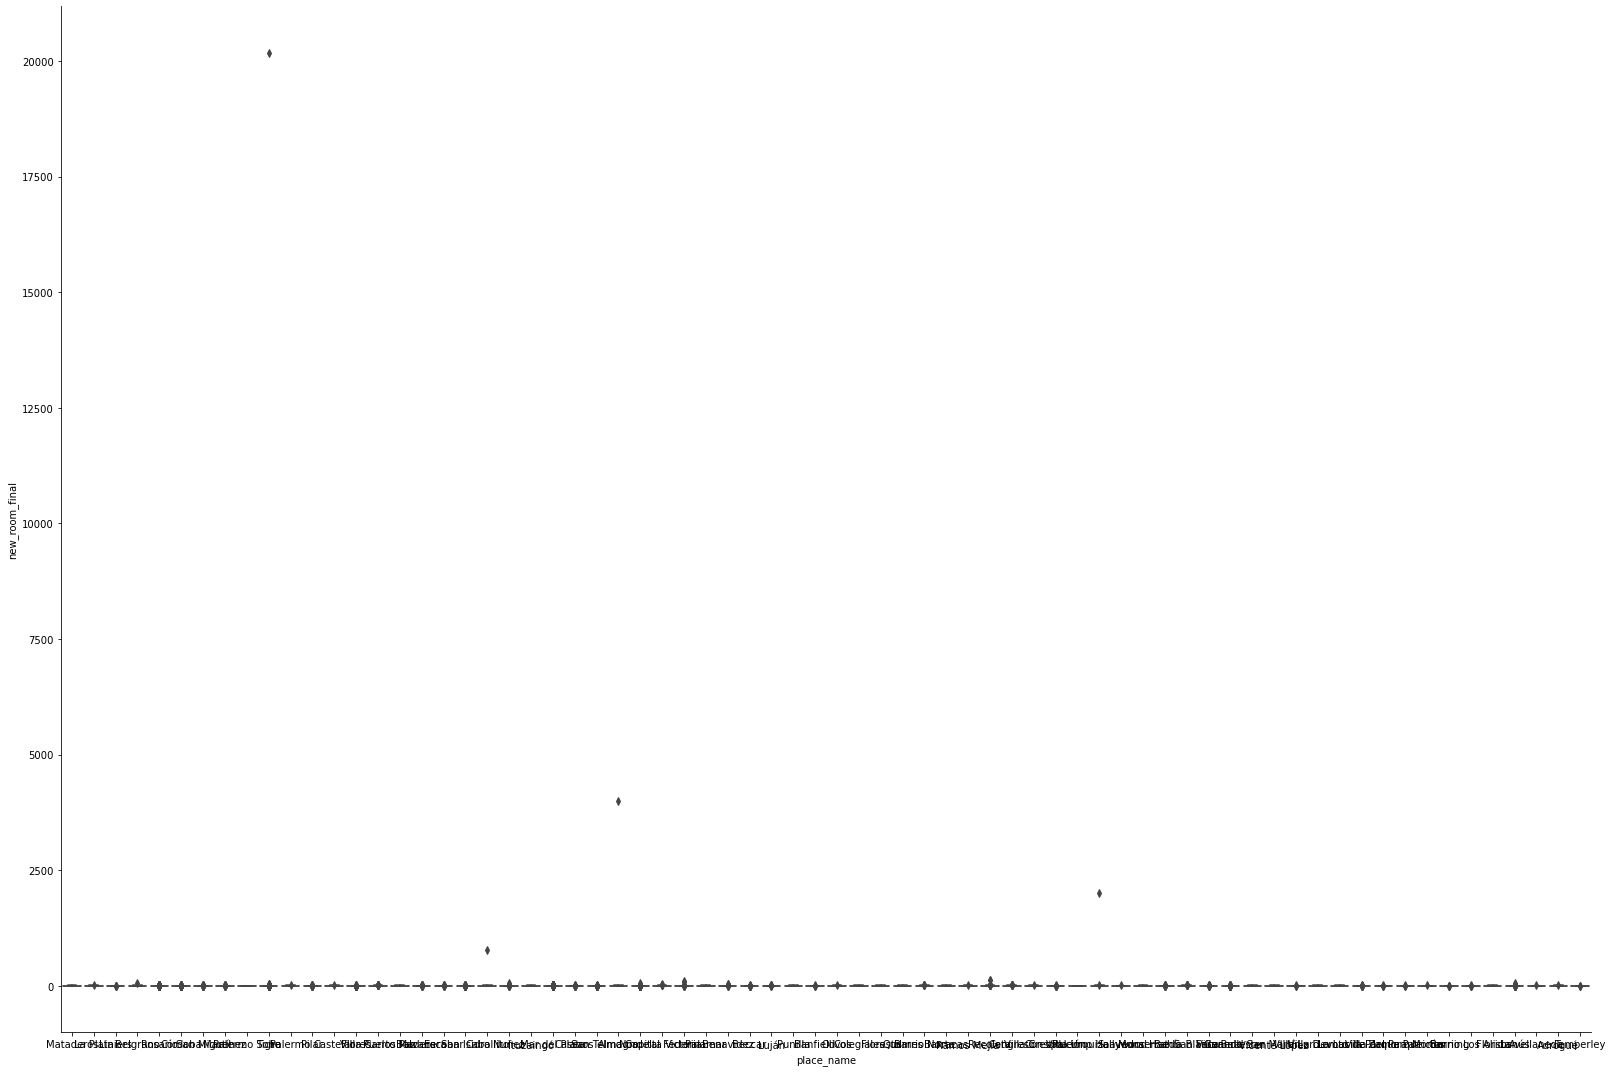

In [7]:

ax = sns.catplot(x="place_name", y="new_room_final", data=data, kind='box',
            height=15, aspect=1.5)

In [8]:
unique_state_name=data.place_name.unique()

place_name_loop=[]
lim_room_inf=[]
lim_room_sup=[]

for i in unique_state_name:
    inf=data[data.place_name=="{}".format(i)].new_room_final.quantile(q=0.75)-1.5*(data[data.place_name=="{}".format(i)].new_room_final.quantile(q=0.75)-data[data.place_name=="{}".format(i)].new_room_final.quantile(q=0.25))
    sup=data[data.place_name=="{}".format(i)].new_room_final.quantile(q=0.75)+1.5*(data[data.place_name=="{}".format(i)].new_room_final.quantile(q=0.75)-data[data.place_name=="{}".format(i)].new_room_final.quantile(q=0.25))    
    lim_room_sup.append(sup)
    lim_room_inf.append(inf)
    place_name_loop.append(i)

outlier_room_management=pd.DataFrame({'place_name' : place_name_loop,'lim_room_inf' : lim_room_inf,'lim_room_sup' : lim_room_sup })

data=data=pd.merge(data, outlier_room_management, how='inner', on=['place_name'])

data_room_outlier_mask=(data['new_room_final']>=data['lim_room_inf']) & (data['new_room_final']< data['lim_room_sup'])
data=data[data_room_outlier_mask]

In [9]:
#checkeo vacios 
nulls = data.apply(lambda x: x.isnull().sum() , axis=0)
#Calculamos el porcentaje de nulos por total de filas
nulls_porcentaje= data.apply(lambda x: x.isnull().sum()*100/x.size,axis=0)
#Ordenamos de mayor a menor por participacion de nulos
#print(nulls_porcentaje.sort_values(ascending=False))
#get dummies de place_name
dummies=pd.get_dummies(data.loc[:,["place_name","new_operacion","new_tipo_prop"]],drop_first=True)
#data.place_name.str.get_dummies().head(10) Descartamos por alta dimensionalidad
#get dummies de state_name
data=pd.concat([data,dummies] , axis=1)

#data.to_csv('salida.csv')
nulls_porcentaje


Unnamed: 0                     0.000000
operation                      0.000000
property_type                  0.000000
place_name                     0.000000
place_with_parent_names        0.000000
country_name                   0.000000
state_name                     0.000000
geonames_id                   12.003444
lat-lon                       37.993482
lat                           37.993482
lon                           37.993482
price                          0.000000
currency                       0.000000
price_aprox_local_currency     0.000000
price_aprox_usd                0.000000
surface_total_in_m2            0.000000
surface_covered_in_m2          6.930267
price_usd_per_m2               0.000000
price_per_m2                   6.936416
floor                         94.204280
rooms                         55.814168
expenses                      81.422949
properati_url                  0.000000
description                    0.000000
title                          0.000000


In [10]:
data.price_usd_per_m2.isnull().sum()

0

In [11]:
data.place_name.value_counts().sort_values(ascending=True)

Luján                 42
Canning               70
Punilla              122
Parque Patricios     128
Temperley            130
                    ... 
Palermo             1444
Belgrano            1471
Córdoba             1654
Rosario             1826
Mar del Plata       2575
Name: place_name, Length: 70, dtype: int64

In [12]:
place_name_unique=data.place_name.unique()
data_place_name =[]
for i in place_name_unique: 
    place= "place_name_"+"{}".format(i)
    data_place_name.append(place)
    
    
    
data_place_name

['place_name_Mataderos',
 'place_name_La Plata',
 'place_name_Liniers',
 'place_name_Belgrano',
 'place_name_Rosario',
 'place_name_Córdoba',
 'place_name_San Miguel',
 'place_name_Martínez',
 'place_name_Palermo Soho',
 'place_name_Tigre',
 'place_name_Palermo',
 'place_name_Pilar',
 'place_name_Castelar',
 'place_name_Flores',
 'place_name_Villa Carlos Paz',
 'place_name_Puerto Madero',
 'place_name_Balvanera',
 'place_name_Escobar',
 'place_name_San Isidro',
 'place_name_Caballito',
 'place_name_Nuñez',
 'place_name_Ituzaingó',
 'place_name_Mar del Plata',
 'place_name_Caseros',
 'place_name_San Telmo',
 'place_name_Almagro',
 'place_name_Nordelta',
 'place_name_Capital Federal',
 'place_name_Victoria',
 'place_name_Pinamar',
 'place_name_Benavidez',
 'place_name_Beccar',
 'place_name_Luján',
 'place_name_Punilla',
 'place_name_Banfield',
 'place_name_Olivos',
 'place_name_Colegiales',
 'place_name_Floresta',
 'place_name_Quilmes',
 'place_name_Barrio Norte',
 'place_name_Barracas',

In [13]:
data.new_tipo_prop.value_counts()
new_tipo_prop_Counts  = data[data.price_usd_per_m2.notnull()].new_tipo_prop.value_counts()
new_tipo_prop_Counts = pd.DataFrame({'new_tipo_prop':new_tipo_prop_Counts.index, 'conteo_prop':new_tipo_prop_Counts.values})
new_tipo_prop_Counts
data=pd.merge(data, new_tipo_prop_Counts, how='inner', on=['new_tipo_prop'])

data.head()
data["new_tipo_prop_conteo"]=data.conteo_prop
data2=data[data.new_tipo_prop_conteo>700]
data=data2

In [14]:
data.new_tipo_prop.value_counts()


departamento    25523
casa             5464
ph               1401
Name: new_tipo_prop, dtype: int64

In [15]:
data.new_operacion.value_counts()

venta                32362
alquiler                25
alquiler-temporal        1
Name: new_operacion, dtype: int64

In [16]:
data.loc[data.description.str.contains(pat="(estrenar)", case=False, na=False, regex=True),'estrenar_d'] = 1
data.loc[~(data.description.str.contains(pat="(estrenar)", case=False, na=False, regex=True)),'estrenar_d'] = 0
data.loc[data.title.str.contains(pat="(estrenar)", case=False, na=False, regex=True),'estrenar_t'] = 1
data.loc[~(data.title.str.contains(pat="(estrenar)", case=False, na=False, regex=True)),'estrenar_t'] = 0
data["estrenar"]=data.apply(lambda x : x['estrenar_d'] if x['estrenar_d']>0 else x['estrenar_t'], axis=1)

data.loc[data.description.str.contains(pat="(a refaccionar)", case=False, na=False, regex=True),'a refaccionar_d'] = 1
data.loc[~(data.description.str.contains(pat="(a refaccionar)", case=False, na=False, regex=True)),'a refaccionar_d'] = 0
data.loc[data.title.str.contains(pat="(a refaccionar)", case=False, na=False, regex=True),'a refaccionar_t'] = 1
data.loc[~(data.title.str.contains(pat="(a refaccionar)", case=False, na=False, regex=True)),'a refaccionar_t'] = 0
data["a_refaccionar"]=data.apply(lambda x : x['a refaccionar_d'] if x['a refaccionar_d']>0 else x['a refaccionar_t'], axis=1)

data.loc[data.description.str.contains(pat="(refaccionado)", case=False, na=False, regex=True),'refaccionado_d'] = 1
data.loc[~(data.description.str.contains(pat="(refaccionado)", case=False, na=False, regex=True)),'refaccionado_d'] = 0
data.loc[data.title.str.contains(pat="(refaccionado)", case=False, na=False, regex=True),'refaccionado_t'] = 1
data.loc[~(data.title.str.contains(pat="(refaccionado)", case=False, na=False, regex=True)),'refaccionado_t'] = 0
data["refaccionado"]=data.apply(lambda x : x['refaccionado_d'] if x['refaccionado_d']>0 else x['refaccionado_t'], axis=1)

data.loc[data.description.str.contains(pat="(pozo)", case=False, na=False, regex=True),'pozo_d'] = 1
data.loc[~(data.description.str.contains(pat="(pozo)", case=False, na=False, regex=True)),'pozo_d'] = 0
data.loc[data.title.str.contains(pat="(pozo)", case=False, na=False, regex=True),'pozo_t'] = 1
data.loc[~(data.title.str.contains(pat="(pozo)", case=False, na=False, regex=True)),'pozo_t'] = 0
data["pozo"]=data.apply(lambda x : x['pozo_d'] if x['pozo_d']>0 else x['pozo_t'], axis=1)

data.loc[data.description.str.contains(pat="(luminoso)", case=False, na=False, regex=True),'luminoso_d'] = 1
data.loc[~(data.description.str.contains(pat="(luminoso)", case=False, na=False, regex=True)),'luminoso_d'] = 0
data.loc[data.title.str.contains(pat="(luminoso)", case=False, na=False, regex=True),'luminoso_t'] = 1
data.loc[~(data.title.str.contains(pat="(luminoso)", case=False, na=False, regex=True)),'luminoso_t'] = 0
data["luminoso"]=data.apply(lambda x : x['luminoso_d'] if x['luminoso_d']>0 else x['luminoso_t'], axis=1)

data.loc[data.description.str.contains(pat="(vista)", case=False, na=False, regex=True),'vista_d'] = 1
data.loc[~(data.description.str.contains(pat="(vista)", case=False, na=False, regex=True)),'vista_d'] = 0
data.loc[data.title.str.contains(pat="(vista)", case=False, na=False, regex=True),'vista_t'] = 1
data.loc[~(data.title.str.contains(pat="(vista)", case=False, na=False, regex=True)),'vista_t'] = 0
data["vista"]=data.apply(lambda x : x['vista_d'] if x['vista_d']>0 else x['vista_t'], axis=1)

data.loc[data.description.str.contains(pat="(exclusiv)", case=False, na=False, regex=True),'exclusiv_d'] = 1
data.loc[~(data.description.str.contains(pat="(exclusiv)", case=False, na=False, regex=True)),'exclusiv_d'] = 0
data.loc[data.title.str.contains(pat="(exclusiv)", case=False, na=False, regex=True),'exclusiv_t'] = 1
data.loc[~(data.title.str.contains(pat="(exclusiv)", case=False, na=False, regex=True)),'exclusiv_t'] = 0
data["exclusiv"]=data.apply(lambda x : x['exclusiv_d'] if x['exclusiv_d']>0 else x['exclusiv_t'], axis=1)

data.loc[data.description.str.contains(pat="(lujo)", case=False, na=False, regex=True),'lujo_d'] = 1
data.loc[~(data.description.str.contains(pat="(lujo)", case=False, na=False, regex=True)),'lujo_d'] = 0
data.loc[data.title.str.contains(pat="(lujo)", case=False, na=False, regex=True),'lujo_t'] = 1
data.loc[~(data.title.str.contains(pat="(lujo)", case=False, na=False, regex=True)),'lujo_t'] = 0
data["lujo"]=data.apply(lambda x : x['lujo_d'] if x['lujo_d']>0 else x['lujo_t'], axis=1)

data.loc[data.description.str.contains(pat="(premium)", case=False, na=False, regex=True),'premium_d'] = 1
data.loc[~(data.description.str.contains(pat="(premium)", case=False, na=False, regex=True)),'premium_d'] = 0
data.loc[data.title.str.contains(pat="(premium)", case=False, na=False, regex=True),'premium_t'] = 1
data.loc[~(data.title.str.contains(pat="(premium)", case=False, na=False, regex=True)),'premium_t'] = 0
data["premium"]=data.apply(lambda x : x['premium_d'] if x['premium_d']>0 else x['premium_t'], axis=1)


C:\Users\carrasco.angel\Anaconda3\envs\dhdsblend\lib\site-packages\pandas\core\strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [17]:
data=data[data.new_room_final.notnull()]


In [18]:
data.place_name.value_counts()

Mar del Plata       2568
Rosario             1814
Córdoba             1643
Belgrano            1467
Palermo             1433
                    ... 
Temperley            127
Parque Patricios     126
Punilla              122
Canning               70
Luján                 42
Name: place_name, Length: 70, dtype: int64

In [19]:
place_name_unique=data.place_name.unique()
data_place_name =[]
for i in place_name_unique: 
    place= "place_name_"+"{}".format(i)
    data_place_name.append(place)
    
    
    
data_place_name

['place_name_Mataderos',
 'place_name_La Plata',
 'place_name_Liniers',
 'place_name_Belgrano',
 'place_name_Rosario',
 'place_name_Córdoba',
 'place_name_San Miguel',
 'place_name_Martínez',
 'place_name_Palermo Soho',
 'place_name_Tigre',
 'place_name_Palermo',
 'place_name_Pilar',
 'place_name_Castelar',
 'place_name_Flores',
 'place_name_Villa Carlos Paz',
 'place_name_Balvanera',
 'place_name_San Isidro',
 'place_name_Caballito',
 'place_name_Nuñez',
 'place_name_Ituzaingó',
 'place_name_Mar del Plata',
 'place_name_Caseros',
 'place_name_San Telmo',
 'place_name_Almagro',
 'place_name_Capital Federal',
 'place_name_Victoria',
 'place_name_Pinamar',
 'place_name_Beccar',
 'place_name_Luján',
 'place_name_Punilla',
 'place_name_Banfield',
 'place_name_Olivos',
 'place_name_Colegiales',
 'place_name_Floresta',
 'place_name_Quilmes',
 'place_name_Barrio Norte',
 'place_name_Barracas',
 'place_name_Ramos Mejía',
 'place_name_Recoleta',
 'place_name_Congreso',
 'place_name_Villa Crespo

In [20]:

from sklearn import linear_model
from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split,cross_val_score,KFold
kf=KFold(n_splits=3,shuffle=True,random_state=10)
#q3=(data.price.quantile(q=0.75)-data.price.quantile(q=0.25))*1.5+data.price.quantile(q=0.75)
#data=data[data.price<q3]

#q31=(data.price_per_m2.quantile(q=0.75)-data.price_per_m2.quantile(q=0.25))*1.5+data.price_per_m2.quantile(q=0.75)
#data=data[data.price_per_m2<q31]


X=data.loc[:,[ #'new_room_final',
              'place_name_Mataderos',
 'place_name_La Plata',
 'place_name_Liniers',
 'place_name_Belgrano',
 'place_name_Rosario',
 'place_name_Córdoba',
 'place_name_Martínez',
 'place_name_Palermo Soho',
 'place_name_Tigre',
 'place_name_Palermo',
 'place_name_Pilar',
 'place_name_Castelar',
 'place_name_Flores',
 'place_name_Villa Carlos Paz',
 'place_name_Balvanera',
 'place_name_San Isidro',
 'place_name_Caballito',
 'place_name_Nuñez',
 'place_name_Ituzaingó',
 'place_name_Mar del Plata',
 #'place_name_Caseros',
 'place_name_San Telmo',
 'place_name_Almagro',
 'place_name_Capital Federal',
 'place_name_Victoria',
 'place_name_Pinamar',
 'place_name_Beccar',
 'place_name_Banfield',
 'place_name_Olivos',
 'place_name_Colegiales',
 'place_name_Floresta',
 'place_name_Quilmes',
 'place_name_Barrio Norte',
 'place_name_Barracas',
 'place_name_Ramos Mejía',
 'place_name_Recoleta',
 'place_name_Congreso',
 'place_name_Villa Crespo',
 'place_name_Constitución',
 'place_name_Villa Urquiza',
 'place_name_Palermo Hollywood',
 'place_name_Saavedra',
 'place_name_Monserrat',
 'place_name_Haedo',
 'place_name_Bahía Blanca',
 'place_name_San Fernando',
 'place_name_Villa Ballester',
 #'place_name_General San Martín',
 'place_name_Vicente López',
 'place_name_Villa Luro',
 'place_name_Villa Devoto',
 'place_name_Lomas de Zamora',
 'place_name_Villa del Parque',
 'place_name_Parque Patricios',
 'place_name_Canning',
 'place_name_Florida',
 #'place_name_Lanús',
 #'place_name_Avellaneda',
 'place_name_Temperley',
 #'place_name_San Miguel',
 'place_name_Escobar',
 'place_name_Nordelta',
 'place_name_Luján',
 'place_name_La Lucila',
 'place_name_Barrio Los Alisos',
 #'place_name_Adrogué',
 'place_name_Puerto Madero',
               #,'new_m2_covered_final',
       'gym', 
              #'sum',
               #'pileta', 'spa', 
              #'balcon' ,
              'patio',
    #'terraza', 
    'hidromasaje', 
              #'new_operacion_venta',
       'new_tipo_prop_casa', 'new_tipo_prop_departamento', 'new_tipo_prop_ph',
              'estrenar',
              #'refaccionado',
              'premium','luminoso','lujo','pozo','exclusiv','vista','surface_total_in_m2'
              
              
             ]  ]                                            
y=data['price_usd_per_m2']

X_train,X_test,y_train,y_test = train_test_split (X,y,test_size=0.20,random_state=10,shuffle=True)
#lr=linear_model.LinearRegression()
#model=lr.fit(X_train,y_train)
#y_pred=lr.predict(X_test)

lm_ridge=linear_model.ElasticNetCV(alphas=[0.00001, 0.00005, 0.0001, 0.0005, 0.001,0.003, 0.005,0.006,0.008, 
    0.01,\
                                        0.05, 0.1, 1, 5, 10],normalize=True,cv=kf,max_iter=200000
                             )

model=lm_ridge.fit(X_train,y_train)
y_pred=lm_ridge.predict(X_test)
#r2=r2_score(y_pred,y_test)
#r2
round (model.score(X_test,y_test),2)
#model.alpha_


#y_predicted=pd.DataFrame(y_pred)
#print(y_predicted)
#y_tested=pd.DataFrame (y_test)
#print (y_test)
#comparison= pd.concat(y_tested, y_predicted)
#comparison=comparison.loc[:,["ds","y","yhat"]]


0.71

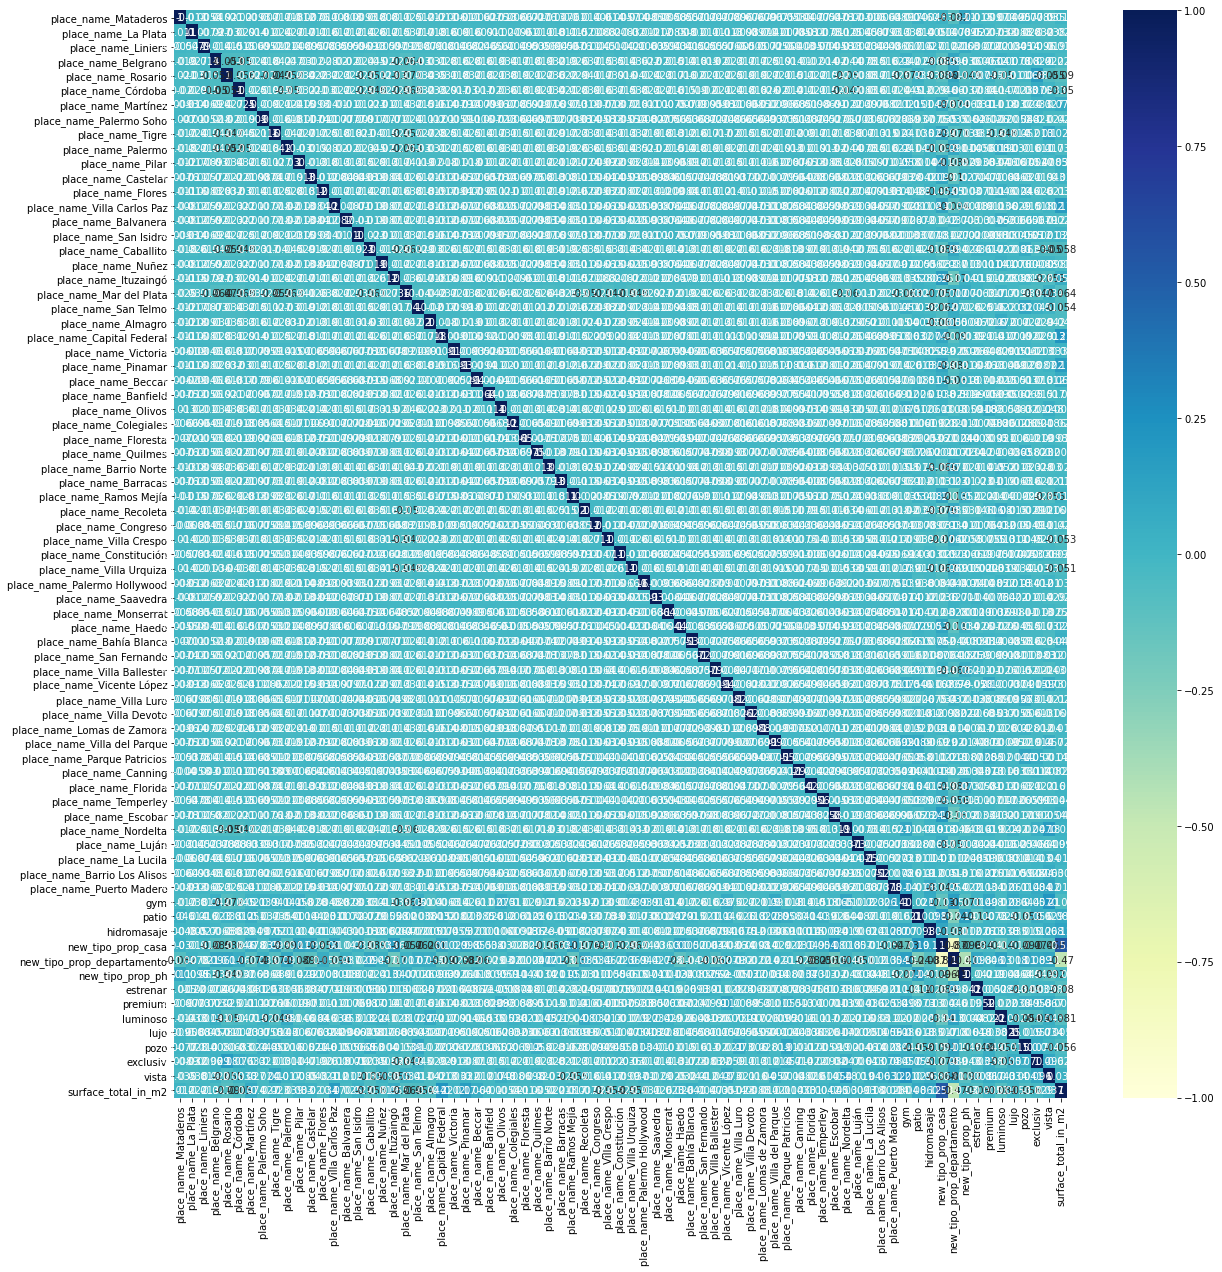

In [21]:
plt.figure(figsize=(20,20))
sns.heatmap(X.corr(), vmin=-1, vmax=1, center=0, cmap="YlGnBu",annot=True);

In [22]:
import statsmodels.api as sm
#X = np.append(arr = np.ones((50, 1)).astype(int), values = X, axis = 1)

regressor_OLS = sm.OLS(endog = y_train, exog = X_train).fit()

regressor_OLS.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       price_usd_per_m2   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     896.9
Date:                Tue, 22 Dec 2020   Prob (F-statistic):               0.00
Time:                        17:52:11   Log-Likelihood:            -1.9769e+05
No. Observations:               25910   AIC:                         3.955e+05
Df Residuals:                   25835   BIC:                         3.961e+05
Df Model:                          74                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
place_name_Mataderos           205.3439     38.383      5.350      0.000     130.112     280.576
place_name_La Plata            145.0037     28.579      5.074      0.000      88.988     201.019
place_name_Liniers             424.1401     50.758      8.356      0.000     324.652     523.628
place_name_Belgrano           1439.3605     19.902     72.324      0.000    1400.352    1478.369
place_name_Rosario              96.0843     18.933      5.075      0.000      58.974     133.194
place_name_Córdoba            -174.0002     19.259     -9.035      0.000    -211.749    -136.251
place_name_Martínez           1173.5684     31.795     36.910      0.000    1111.248    1235.889
place_name_Palermo Soho       1492.1028     39.977     37.324      0.000    1413.746    1570.459
place_name_Tigre               485.5229     21.040     23.077      0.000     444.284     526.761
place_name_Palermo            1569.5802     20.003     78.467      0.000    1530.373    1608.788
place_name_Pilar               162.0138     25.916      6.252      0.000     111.218     212.810
place_name_Castelar            377.0911     37.417     10.078      0.000     303.752     450.430
place_name_Flores              506.3303     27.382     18.492      0.000     452.661     560.000
place_name_Villa Carlos Paz   -249.8517     35.965     -6.947      0.000    -320.345    -179.358
place_name_Balvanera           381.6334     36.117     10.566      0.000     310.841     452.425
place_name_San Isidro          914.4393     30.830     29.661      0.000     854.012     974.867
place_name_Caballito           899.8733     20.377     44.160      0.000     859.932     939.814
place_name_Nuñez              1277.9230     36.124     35.376      0.000    1207.118    1348.728
place_name_Ituzaingó            50.9271     28.963      1.758      0.079      -5.842     107.696
place_name_Mar del Plata       252.7056     17.228     14.669      0.000     218.939     286.472
place_name_San Telmo           798.5332     26.852     29.738      0.000     745.901     851.165
place_name_Almagro             685.3898     25.786     26.580      0.000     634.848     735.931
place_name_Capital Federal     433.4743     28.263     15.337      0.000     378.077     488.871
place_name_Victoria            615.9964     44.713     13.777      0.000     528.356     703.637
place_name_Pinamar             210.6959     27.657      7.618      0.000     156.486     264.906
place_name_Beccar              516.5818     45.057     11.465      0.000     428.268     604.896
place_name_Banfield            411.1843     38.166     10.774      0.000     336.377     485.992
place_name_Olivos             1181.0512     23.995     49.220      0.000    1134.019    1228.084
place_name_Colegiales          987.9316     41.809     23.630      0.000    

In [23]:
print(model.score(X_test,y_test))
print(model.score(X_train,y_train))
ols_y_predtrain = regressor_OLS.predict()
y_predtrain =lm_ridge.predict(X_train)
r2elastic = model.score(X_train,y_train)
r2ols = regressor_OLS.rsquared_adj
y_pred=lm_ridge.predict(X_test)
print(r2ols)

0.7066100355140571
0.700170750511882
0.7190136656524082


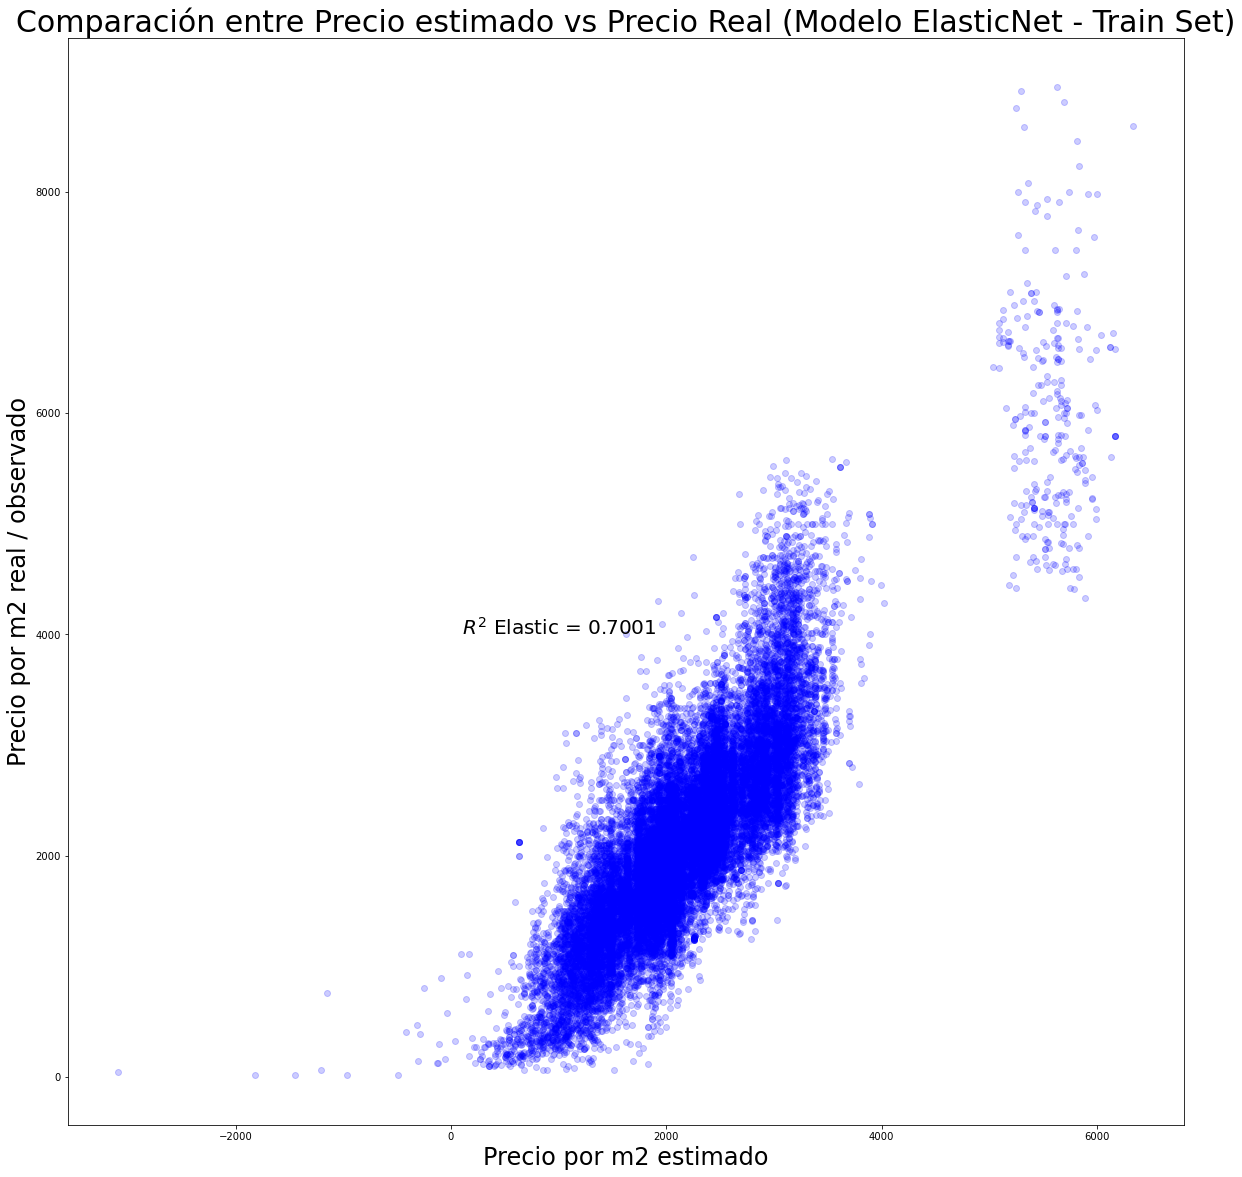

In [28]:
#Grafico para comparar resultados entre y_modelo e y_real del train set. Modelo ElasticNet.
plt.figure(figsize=(20,20))
plt.scatter(y_predtrain, y_train, color = "blue", alpha = 0.2)
plt.xlabel("Precio por m2 estimado", fontdict=dict(fontsize=24))
plt.ylabel("Precio por m2 real / observado", fontdict=dict(fontsize=24))
plt.title("Comparación entre Precio estimado vs Precio Real (Modelo ElasticNet - Train Set)", fontdict=dict(fontsize=30))
plt.text(x = 100, y = 4000, s = "$R^2$ Elastic = 0.7001", fontdict=dict(fontsize=20))
plt.show()

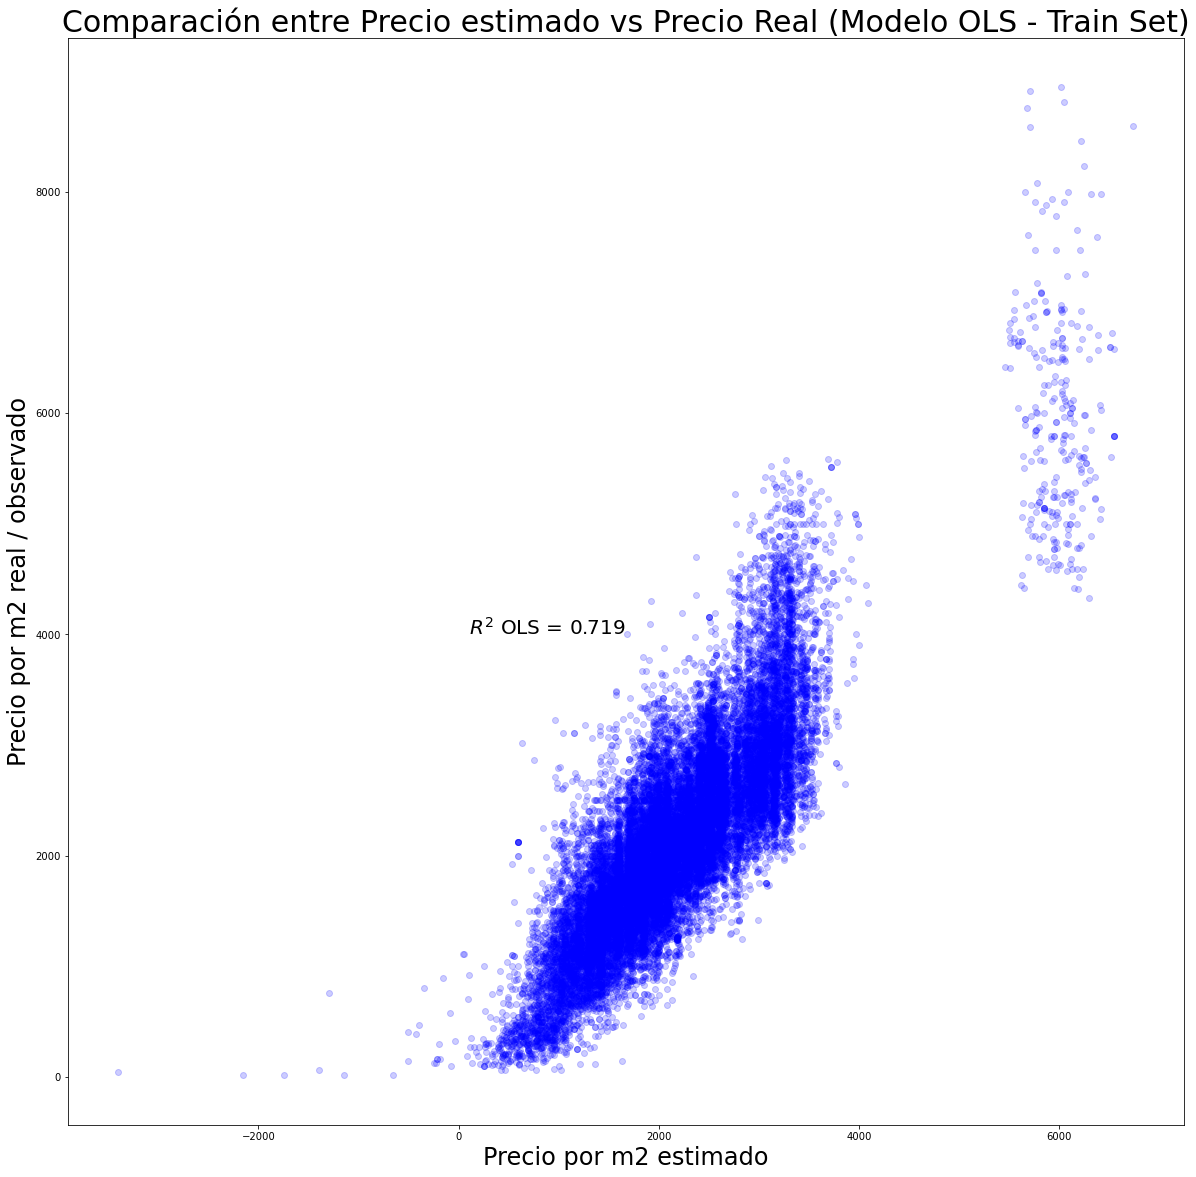

In [29]:
#Grafico para comparar resultados entre y_modelo e y_real del train set. Modelo OLS.
plt.figure(figsize=(20,20))
plt.scatter(ols_y_predtrain, y_train, color = "blue", alpha = 0.2)
plt.xlabel("Precio por m2 estimado", fontdict=dict(fontsize=24))
plt.ylabel("Precio por m2 real / observado", fontdict=dict(fontsize=24))
plt.title("Comparación entre Precio estimado vs Precio Real (Modelo OLS - Train Set)", fontdict=dict(fontsize=30))
plt.text(x = 100, y = 4000, s = "$R^2$ OLS = 0.719", fontdict=dict(fontsize=20))
plt.show()

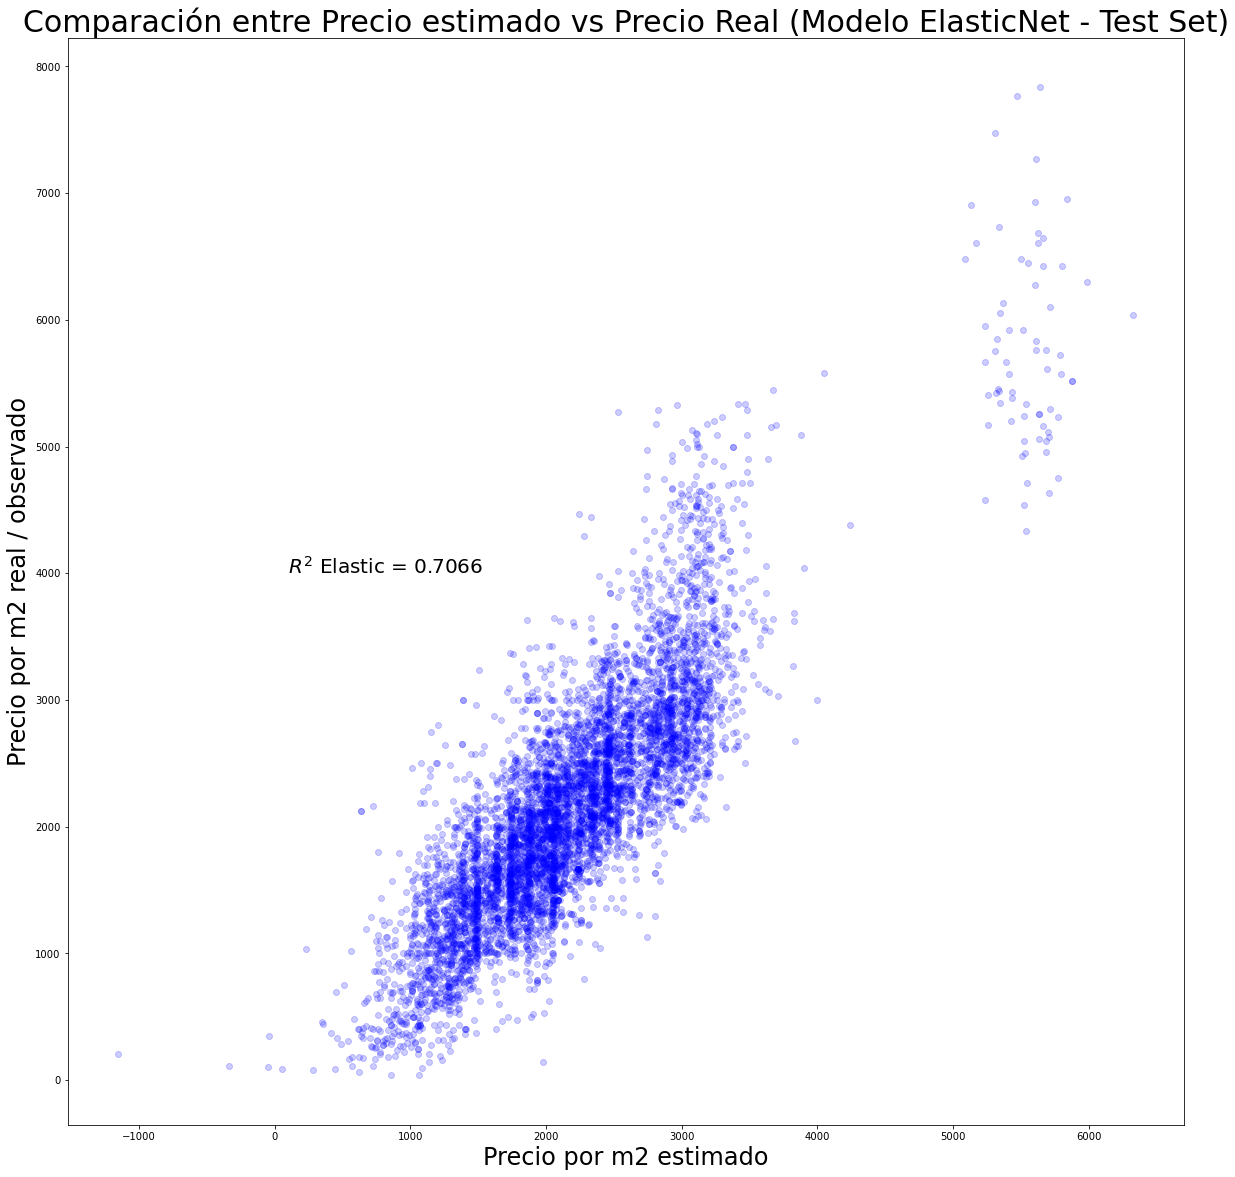

In [30]:
#Grafico para comparar resultados entre y_modelo e y_real del test set. Modelo ElasticNet.
plt.figure(figsize=(20,20))
plt.scatter(y_pred, y_test, color = "blue", alpha = 0.2)
plt.xlabel("Precio por m2 estimado", fontdict=dict(fontsize=24))
plt.ylabel("Precio por m2 real / observado", fontdict=dict(fontsize=24))
plt.title("Comparación entre Precio estimado vs Precio Real (Modelo ElasticNet - Test Set)", fontdict=dict(fontsize=30))
plt.text(x = 100, y = 4000, s = "$R^2$ Elastic = 0.7066", fontdict=dict(fontsize=20))
plt.show()